In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

This work will entail developing a model capable of detecting fraud or, more specifically, fraudulent credit card transactions.
The dataset used was obtained from Kaggle.
This topic seemed quite interesting to us because it is about a very serious subject because it involves money, and often a lot of money, and we believe that if we can get a very good model, it will be useful for some future work, such as in an electronic system that requires transactions, it will be useful to have such a system that helps to indicate whether the transaction you are attempting to make is true or not.

In [2]:
data=pd.read_csv("creditcard.csv")

In [3]:
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
data.isnull().sum().max() #SHOULD BE 0  To ensure there are no null values

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
cols = [ 'V'+str(i+1) for i in range(28) ] + ['Amount']

X = data[cols]
y = data['Class']

m = len(y)

The dataset has 29 features and only one output, which is a 0/1 indicating whether the feature is not fraudulent or fraudulent.
Only one of the features has a readable title, "Amount," while the remaining features range from V1 to V28 for the users who provided the data's privacy and security, and this data is also somewhat standardized.

Text(0.5, 1.0, 'Not fraudulent vs fraudulent cases')

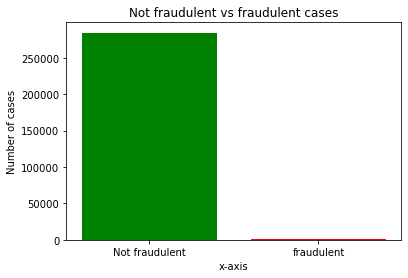

In [9]:
len_fraud=y.value_counts()[1]
len_normal=y.value_counts()[0]
y_label=[len_normal,len_fraud]
tick_label=["Not fraudulent", "fraudulent"]
plt.bar([0,1],y_label,tick_label=tick_label,color=['green', 'red'])

plt.xlabel("x-axis")
plt.ylabel("Number of cases")
plt.title("Not fraudulent vs fraudulent cases")

Observing the graph above, we can see that the fraudulent cases are completely outweighed by the non-fraudulent ones, resulting in the percentages that:

In [10]:
print ("Fraud = ", round(len_fraud/(len_fraud+len_normal)*100,2) , "%")
print ("Non Fraud = ", round(len_normal/(len_fraud+len_normal)*100,2) ,"%")

Fraud =  0.17 %
Non Fraud =  99.83 %


This data still needs to be normalized, and what has been done in the cell below is a data normalization and need to by sub-Sample the dataset.
Normalization is necessary because there are some features that have much higher values ​​than other features and so these features would influence the result more than other features when our goal is for all features to have a minimally similar weight
Doing a sub-sample of the dataset is also necessary since the percent of frauds is too low, this would make our classifier end up assigning almost everything as non-fraudulent even if it was fraudulent like this when trying to put the dataset 50 percent 50 in fraudulent vs non-fraudulent will help a lot in the effectiveness of the classifier and also to be able to understand which features are the ones that indicate more fraud.

In [11]:
sc_X=StandardScaler()
sc_X.fit(X)  #Fit the scaller ONLY to the TRAINING DATA
X=sc_X.transform(X) #Transform the training data
X = pd.DataFrame(X, columns = cols)

In [12]:
normal = (y==0)
fraud = (y==1)

size = X[fraud].shape[0]

X['Class'] = y

normal_transactions = X[normal]
normal_transactions = normal_transactions.sample(frac=1)
normal_transactions = normal_transactions[:size]

fraud_transactions = X[fraud][:size]

Text(0.5, 1.0, 'Not fraudulent vs fraudulent cases')

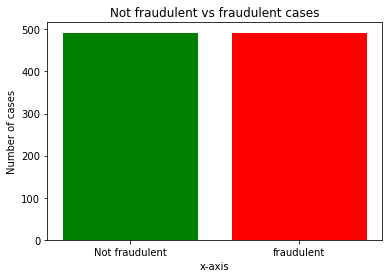

In [13]:

len_fraud=len(normal_transactions)
len_normal=len(fraud_transactions)
y_label=[len_normal,len_fraud]
tick_label=["Not fraudulent", "fraudulent"]
plt.bar([0,1],y_label,tick_label=tick_label,color=['green', 'red'])

plt.xlabel("x-axis")
plt.ylabel("Number of cases")
plt.title("Not fraudulent vs fraudulent cases")

As you can see, the new dataset has been distributed, so we can now analyze the features to see which ones have more weight and also to ensure that our classifier does not misclassify a new case.

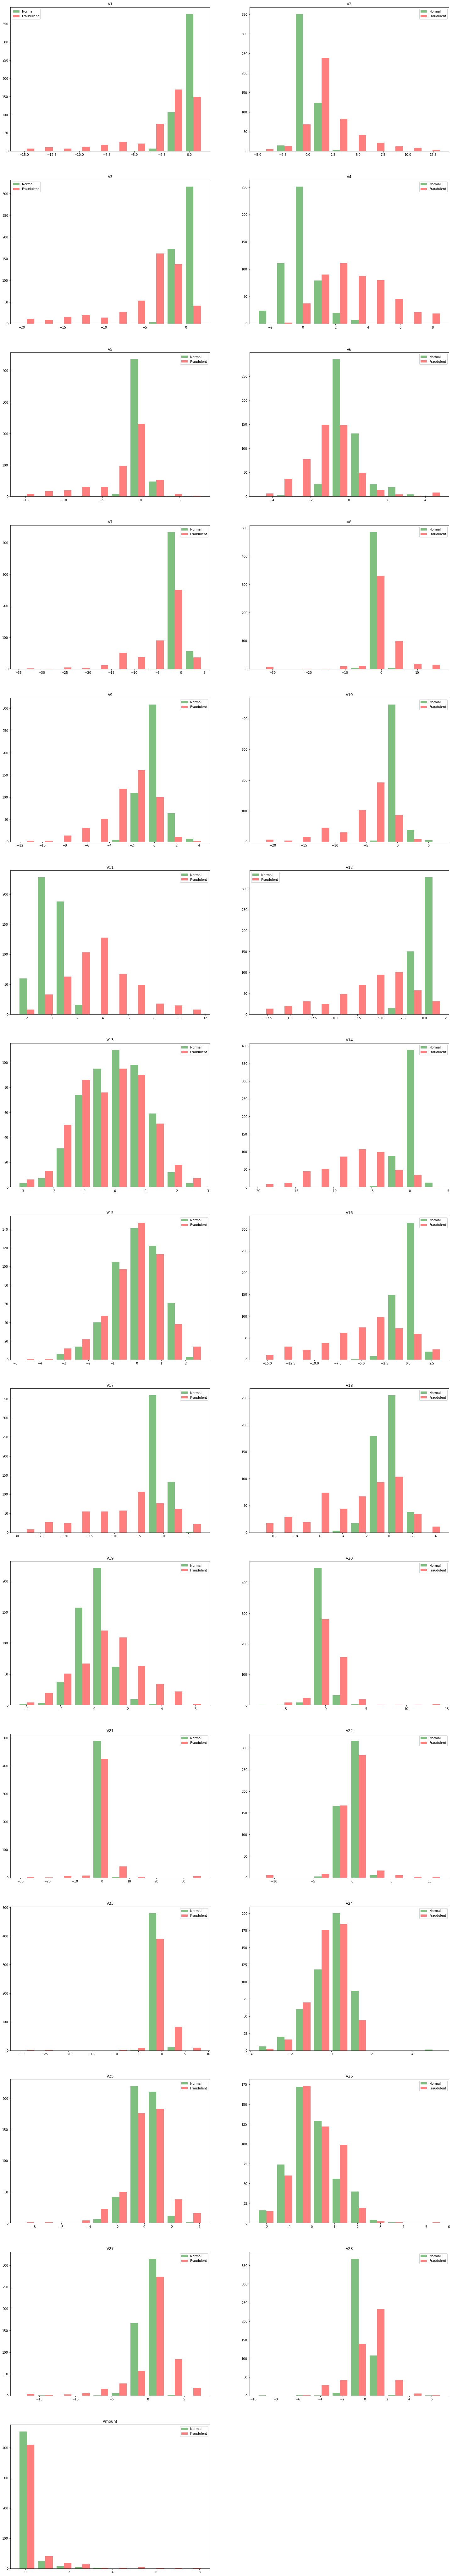

In [14]:
plt.figure(1, figsize=(25, 150))

for i in range(len(cols)):
    plt.subplot(15, 2, i+1)
    feature = cols[i]
    plt.hist([normal_transactions[feature], fraud_transactions[feature]], 10, color=['green', 'red'], alpha=0.5, label=["Normal", "Fraudulent"])
    plt.legend()
    plt.title(feature)
    
plt.show()

By analyzing the behavior of bar charts, we can get a sense of which features and values of a bar chart change more from a normal transaction to a fraudulent one; this can be very useful in understanding which features are more indicative of a fraud.
These are the features:V2,V3,V4,V5,V10,V11,V12,V14,V16,V17,V18,V19

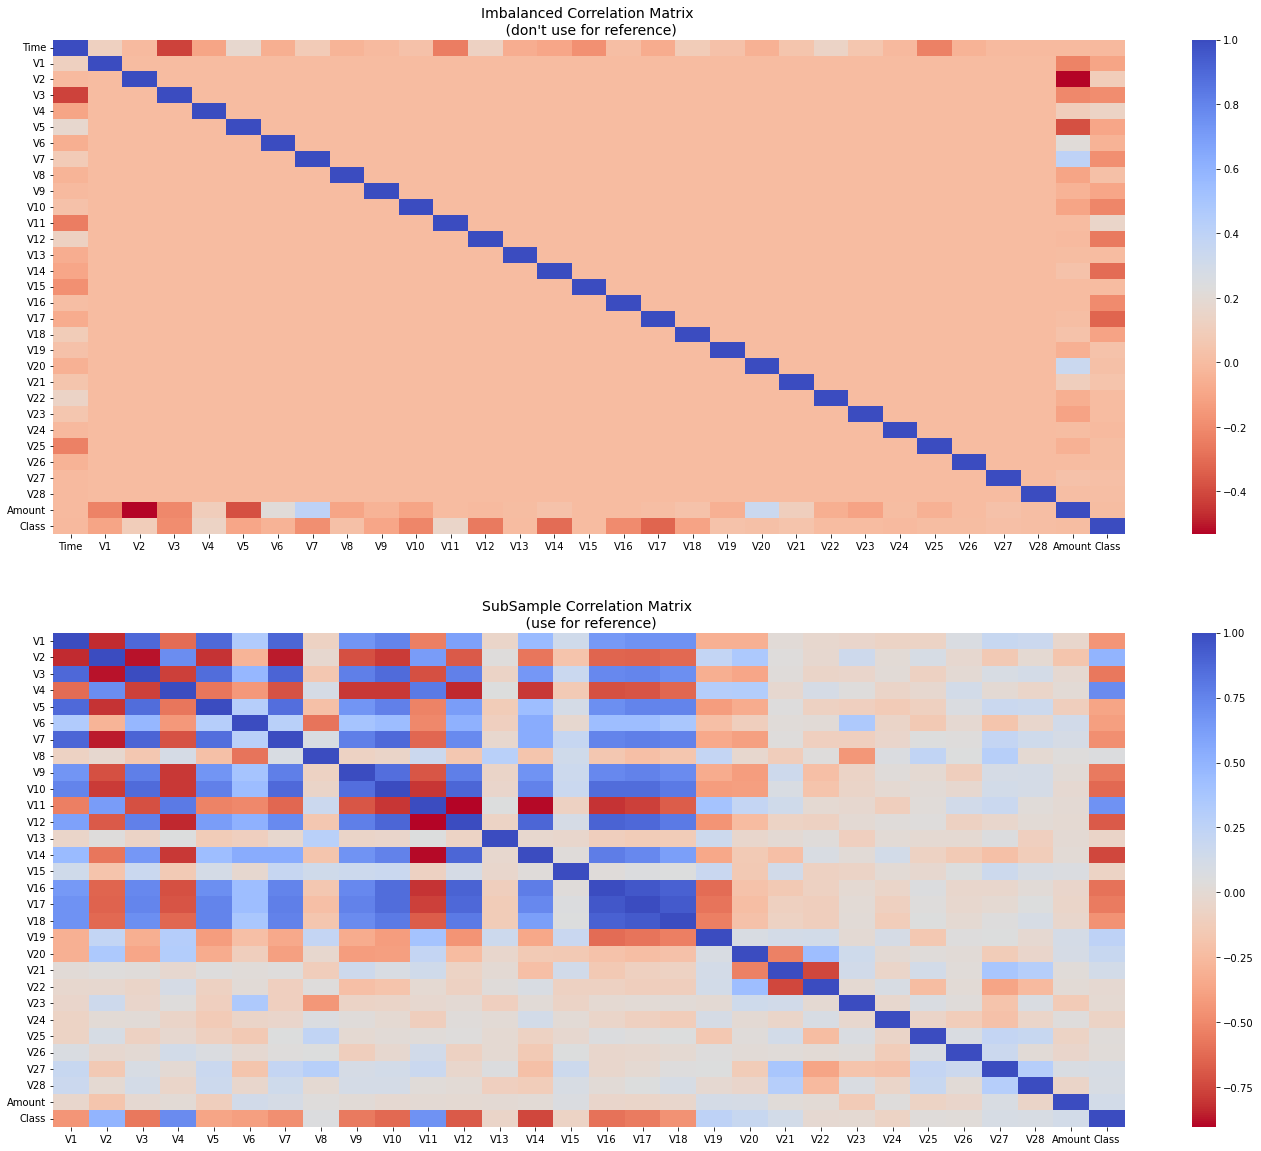

In [15]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

sub_sample_corr = pd.concat([normal_transactions, fraud_transactions]).corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

Observing the correlation matrix of the original data, in the line of the Class, which is this line that we have to see which features have more weight on it, it is very difficult to conclude which features have more weight on, or better, just the ones negative are those that are easily visible as having the greatest weight.
We can easily conclude not only the negatives but also the positives based on the subSample.
But what are you hoping to achieve with this correlation matrix? Its purpose is to determine which features are closer to the extremes, from which we can conclude which features most easily tell us whether a transaction is fraudulent or not.<br>
The features that are closer to blue have a positive correlation, indicating that the higher the value of this feature, the more likely it is to be a fraudulent transaction, and these are the features: V2, V4, V11, and V19
The features that are closer to red have a negative correlation, indicating that the lower this value is, the more likely the transaction is to be fraudulent, and they are as follows: V10, V12, V14, V16, and V17 are a few examples.

In conclusion, the features that were identified in both cases as the greatest indicators of fraud were:V2,V4,V10,V11,V12,V14,V16,V17,V19

Now let's analyze the boxplots of these features that were considered most important to study.<br>
A boxplot is a standard way of representing the distribution of data based on 5 numbers:Q1( first quadril), minimin, median,Q3 ( third quadril) and maximum <br>
With this we can see the outliners we have and what their values are. We can also see how symmetric the data is or how they are grouped together and how our data is skewed
A boxplot is a plot that shows how the values in the data are spread. While box plots may appear unsophisticated when compared to a histogram or density plot, they have the advantage of taking up less area, which is beneficial for comparing distributions over numerous groups or sets of data.

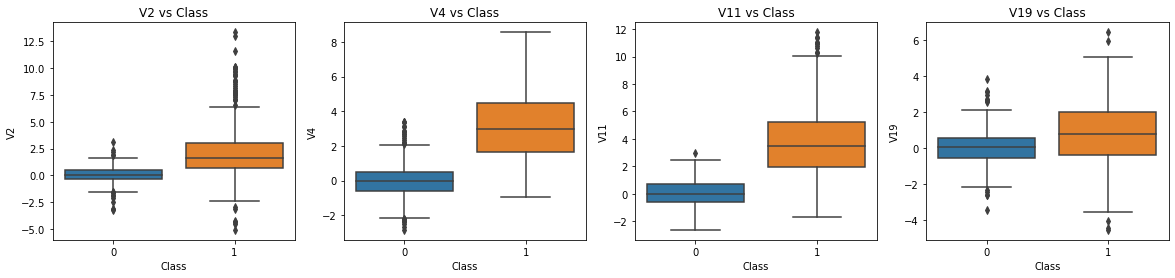

In [16]:
normal_fraud_trans = pd.concat([normal_transactions, fraud_transactions])
selected_features_pos=["V2","V4","V11","V19"]
selected_features_neg=["V10","V12","V14","V16","V17"]
f,axes=plt.subplots(figsize=(20,4),ncols=4)
sns.boxplot(x=normal_fraud_trans["Class"],y=normal_fraud_trans["V2"],ax=axes[0])
sns.boxplot(x=normal_fraud_trans["Class"],y=normal_fraud_trans["V4"],ax=axes[1])
sns.boxplot(x=normal_fraud_trans["Class"],y=normal_fraud_trans["V11"],ax=axes[2])
sns.boxplot(x=normal_fraud_trans["Class"],y=normal_fraud_trans["V19"],ax=axes[3])
axes[0].set_title("V2 vs Class")
axes[1].set_title("V4 vs Class")
axes[2].set_title("V11 vs Class")
axes[3].set_title("V19 vs Class")
plt.show()

Text(0.5, 1.0, 'V17 vs Class')

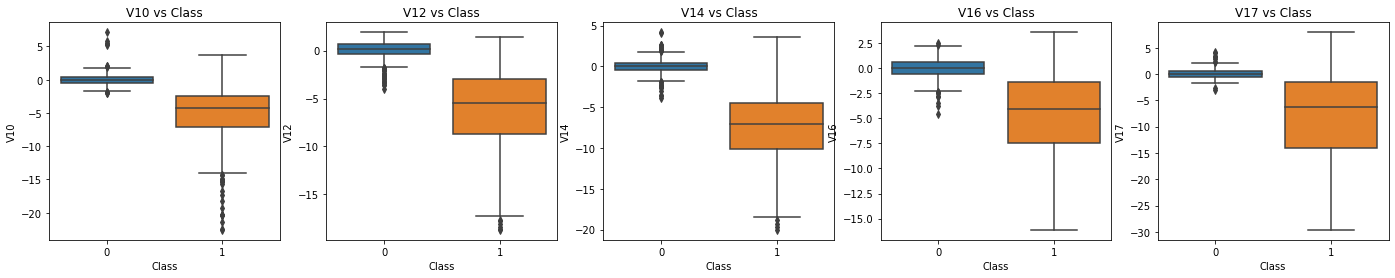

In [17]:
f,axes=plt.subplots(figsize=(24,4),ncols=5)
sns.boxplot(x=normal_fraud_trans["Class"],y=normal_fraud_trans["V10"],ax=axes[0])
sns.boxplot(x=normal_fraud_trans["Class"],y=normal_fraud_trans["V12"],ax=axes[1])
sns.boxplot(x=normal_fraud_trans["Class"],y=normal_fraud_trans["V14"],ax=axes[2])
sns.boxplot(x=normal_fraud_trans["Class"],y=normal_fraud_trans["V16"],ax=axes[3])
sns.boxplot(x=normal_fraud_trans["Class"],y=normal_fraud_trans["V17"],ax=axes[4])
axes[0].set_title("V10 vs Class")
axes[1].set_title("V12 vs Class")
axes[2].set_title("V14 vs Class")
axes[3].set_title("V16 vs Class")
axes[4].set_title("V17 vs Class")


Because some values are "outliers," they must be removed, and the boxplot must be repeated to re-analyze the values obtained.
The features where these values essentially exist are in V2, V19 and V10

In [18]:
def outlier_removal(data,feature, value):
    array = data[feature].loc[data['Class'] == value].values 
    q1, q3 = np.percentile(array, 25), np.percentile(array,75)
    iqr = q3 - q1
    cutoff = iqr*1.5
    lower_threshold = q1 - cutoff
    upper_threshold = q3 + cutoff
    outliers = [a for a in array if a < lower_threshold or a > upper_threshold]
    df = data.drop(data[(data[feature] > upper_threshold) | (data[feature] < lower_threshold)].index)
    return df

Text(0.5, 1.0, 'V2 vs Class OUTLIER')

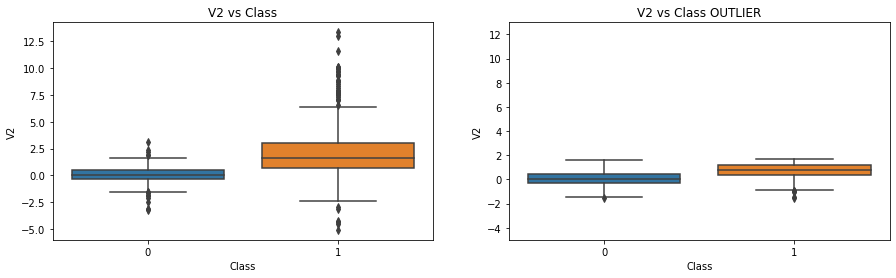

In [19]:
data_outlier_feature_V2=outlier_removal(normal_fraud_trans,"V2",1)
data_outlier_feature_V2=outlier_removal(data_outlier_feature_V2,"V2",0)
f,axes=plt.subplots(figsize=(15,4),ncols=2)
sns.boxplot(x=normal_fraud_trans["Class"],y=normal_fraud_trans["V2"],ax=axes[0])
sns.boxplot(x=data_outlier_feature_V2["Class"],y=data_outlier_feature_V2["V2"],ax=axes[1])
plt.ylim(-5,13)
axes[0].set_title("V2 vs Class")
axes[1].set_title("V2 vs Class OUTLIER")

Text(0.5, 1.0, 'V19 vs Class OUTLIER')

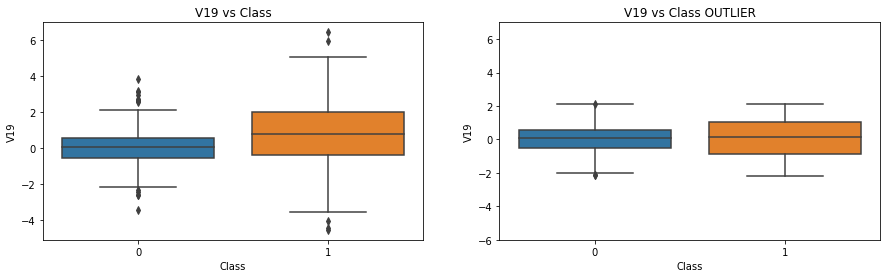

In [20]:
data_outlier_feature_V19=outlier_removal(normal_fraud_trans,"V19",1)
data_outlier_feature_V19=outlier_removal(data_outlier_feature_V19,"V19",0)

f,axes=plt.subplots(figsize=(15,4),ncols=2)
sns.boxplot(x=normal_fraud_trans["Class"],y=normal_fraud_trans["V19"],ax=axes[0])
sns.boxplot(x=data_outlier_feature_V2["Class"],y=data_outlier_feature_V19["V19"],ax=axes[1])
plt.ylim(-6,7)
axes[0].set_title("V19 vs Class")
axes[1].set_title("V19 vs Class OUTLIER")

Text(0.5, 1.0, 'V10 vs Class OUTLIER')

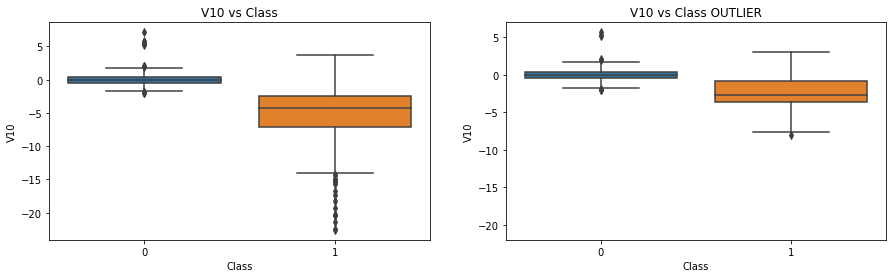

In [21]:
data_outlier_feature_V10=outlier_removal(normal_fraud_trans,"V10",1)
data_outlier_feature_V10=outlier_removal(data_outlier_feature_V10,"V10",0)
f,axes=plt.subplots(figsize=(15,4),ncols=2)
sns.boxplot(x=normal_fraud_trans["Class"],y=normal_fraud_trans["V10"],ax=axes[0])
sns.boxplot(x=data_outlier_feature_V2["Class"],y=data_outlier_feature_V19["V10"],ax=axes[1])
plt.ylim(-22,7)
axes[0].set_title("V10 vs Class")
axes[1].set_title("V10 vs Class OUTLIER")

In [22]:
# EXPLICAR A VACALHADA Q VAI PRAQUI

In [23]:
def naive_predictor(df):
    TP = df.Class.count() - np.sum(df.Class)
    FP = np.sum(df.Class)
    TN = 0
    FN = 0
    
    # TODO: Calculate accuracy, precision and recall
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    recall = TP/(TP+FN)
    precision = TP/(TP+FP)
    
    # TODO: Calculate F-score using the formula above for beta = 1 and correct values for precision and recall.
    fscore = (2*precision*recall)/(precision + recall)
    
    # Print the results 
    print("[Accuracy score: {:.4f}, precision: {:.4f}, recall: {:.4f}, f1-score: {:.4f}]".format(accuracy, precision, recall, fscore))

In [92]:
naive_predictor(normal_fraud_trans)
naive_predictor(data)

[Accuracy score: 0.5000, precision: 0.5000, recall: 1.0000, f1-score: 0.6667]
[Accuracy score: 0.9983, precision: 0.9983, recall: 1.0000, f1-score: 0.9991]


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report, recall_score, precision_score

# clf_log = LogisticRegression(random_state=24, max_iter=1000, class_weight='balanced')

under_y = normal_fraud_trans['Class']
under_X = normal_fraud_trans.drop(['Class'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(under_X, under_y, stratify = under_y)

In [99]:
def basic_train_and_test(clf, X_train, X_test, y_train, y_test):

    clf.fit(X_train, y_train)

    y_pred_train = clf.predict(X_train)
    acc_train = sum(y_train == y_pred_train) / float(len(y_pred_train))
    f1_train = f1_score(y_train, y_pred_train, average='weighted')

    print("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1_train , acc_train))

    y_pred_test = clf.predict(X_test)
    acc_test = sum(y_test == y_pred_test) / float(len(y_pred_test))
    f1_test = f1_score(y_test, y_pred_test, average='weighted')

    print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1_test , acc_test))
    
    return y_pred_test

def get_confusion_matrix(clf, y_pred_test, y_test):
    cm = confusion_matrix(y_test, y_pred_test, labels=[0, 1])
    return cm

def display_cm(clf, cm):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot()
    
def val_curve_acc(p_range, param, X, y, clf):
    
    
    train_scores, valid_scores = validation_curve(clf, X, y.ravel(), param_name = param, 
                                              param_range = p_range, cv=5, scoring="accuracy")


    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(valid_scores, axis=1)
    test_scores_std = np.std(valid_scores, axis=1)

    plt.title("Validation Curve")
    plt.xlabel(param)
    plt.ylabel("Score")

    plt.plot(p_range, train_scores_mean,
         label = "Training Score", color = 'b')
    plt.plot(p_range, test_scores_mean,
       label = "Cross Validation Score", color = 'g')

    plt.legend(loc="best")
    plt.show()

In [27]:
def learningCurve(X, y, Xval, yval, learn_rate, num_iter, Lambda):
    
    """
    Returns the train and cross validation set errors for a learning curve
    """
   
    m = len(y)
    n=X.shape[1]
    mval = len(yval)

    error_train, error_val = [],[]
    
    for i in range(1,m+1):
        
        # inicialize theta vector with 0. 
        initial_theta= np.zeros((X.shape[1],1))
        Xtrain=X[0:i,:]
        ytrain=y[0:i,:]
        #compute the optimal theta :
        theta = gradientDescent( Xtrain, ytrain,initial_theta,learn_rate,num_iter,Lambda)[0]
        
        h_train = np.dot(Xtrain, theta)
        h_val = np.dot(Xval, theta)
        
        error_train_i = 1/(2*m) * np.sum((h_train - ytrain)**2)
        error_val_i = 1/(2*mval) * np.sum((h_val - yval)**2)
        
        error_train.append(error_train_i)
        error_val.append(error_val_i)

    return error_train, error_val

Coefficients: 
 [[ 0.29129158 -0.21535293  0.04432955  1.16563043  0.35748796  0.05458216
   0.01736818 -0.50778053 -0.37106185 -0.76947054  0.4269573  -0.7287018
  -0.308328   -1.20757794 -0.15075568 -0.30415795 -0.50208724 -0.05003146
  -0.12200522 -0.05032696  0.12612525  0.55548244  0.0083157   0.32715644
  -0.21058371 -0.0809303   0.05481114 -0.0790375   0.76779476]]


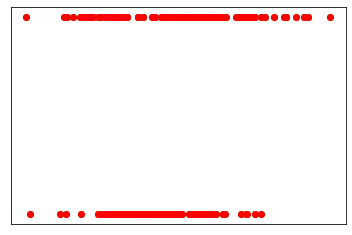

In [28]:
from sklearn.linear_model import LinearRegression

regr = LogisticRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)

# Plot outputs
plt.scatter(X_test['V19'], y_test, color="green")
plt.scatter(X_test['V19'], y_test, color="red")
#plt.scatter(X_test['V19'], y_pred, color="blue")

plt.xticks(())
plt.yticks(())

plt.show()

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

all_models = {}
common_params = dict(
    learning_rate=0.05,
    n_estimators=200,
    max_depth=2,
    min_samples_leaf=9,
    min_samples_split=9,
)
for alpha in [0.05, 0.5, 0.95]:
    gbr = GradientBoostingRegressor(loss="quantile", alpha=alpha, **common_params)
    all_models["q %1.2f" % alpha] = gbr.fit(X_train, y_train)

In [30]:
gbr_ls = GradientBoostingRegressor(loss="ls", **common_params)
all_models["mse"] = gbr_ls.fit(X_train, y_train)

In [31]:
xx = np.repeat(np.atleast_2d(np.linspace(0, 10, 1000)), 29, axis=0).T

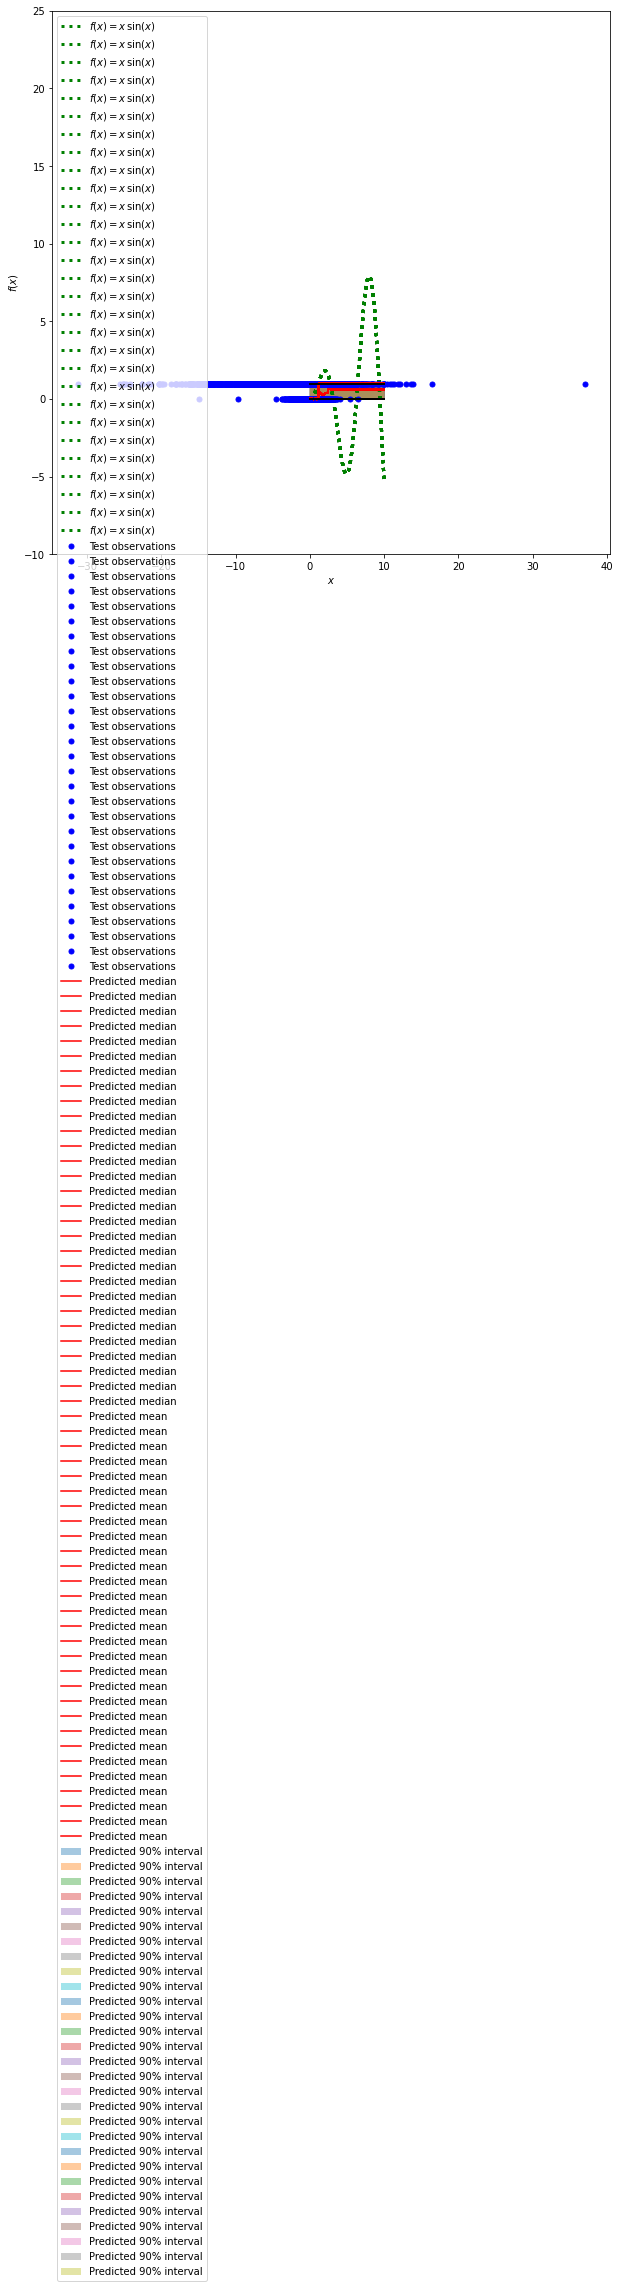

In [32]:
y_pred = all_models["mse"].predict(xx)
y_lower = all_models["q 0.05"].predict(xx)
y_upper = all_models["q 0.95"].predict(xx)
y_med = all_models["q 0.50"].predict(xx)

fig = plt.figure(figsize=(10, 10))
f = lambda x: x * np.sin(x)
plt.plot(xx, f(xx), "g:", linewidth=3, label=r"$f(x) = x\,\sin(x)$")
plt.plot(X_test, y_test, "b.", markersize=10, label="Test observations")
plt.plot(xx, y_med, "r-", label="Predicted median")
plt.plot(xx, y_pred, "r-", label="Predicted mean")
plt.plot(xx, y_upper, "k-")
plt.plot(xx, y_lower, "k-")
for i in range(0,29):
    plt.fill_between(xx[:, i].ravel(), y_lower, y_upper, alpha=0.4, label="Predicted 90% interval")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.ylim(-10, 25)
plt.legend(loc="upper left")
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(
    under_X, under_y, test_size=0.1, random_state=13
)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "ls",
}

In [34]:
reg = GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0606


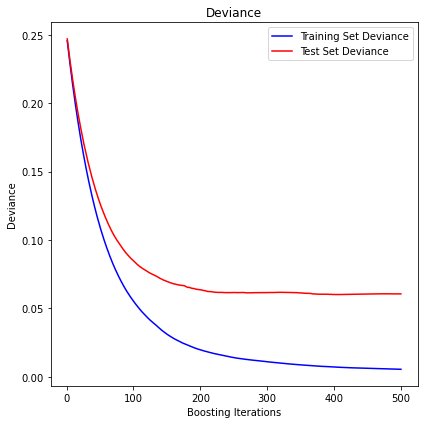

In [35]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

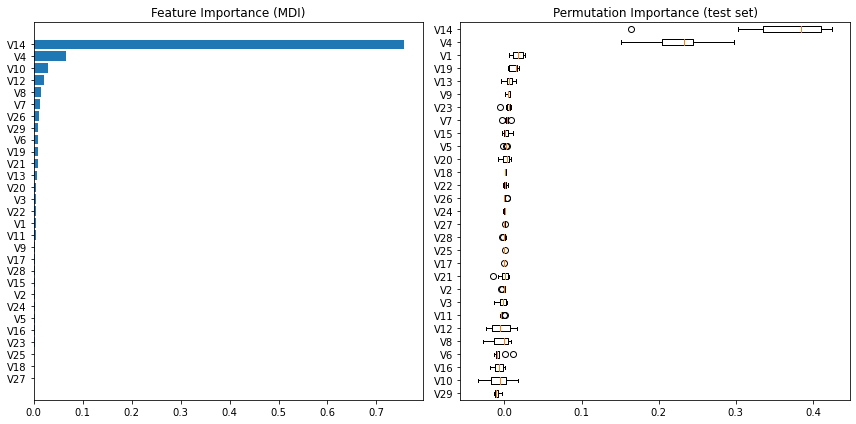

In [36]:

from sklearn.inspection import permutation_importance

features = ['V'+str(i) for i in range(1,30)]
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(features)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(features)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

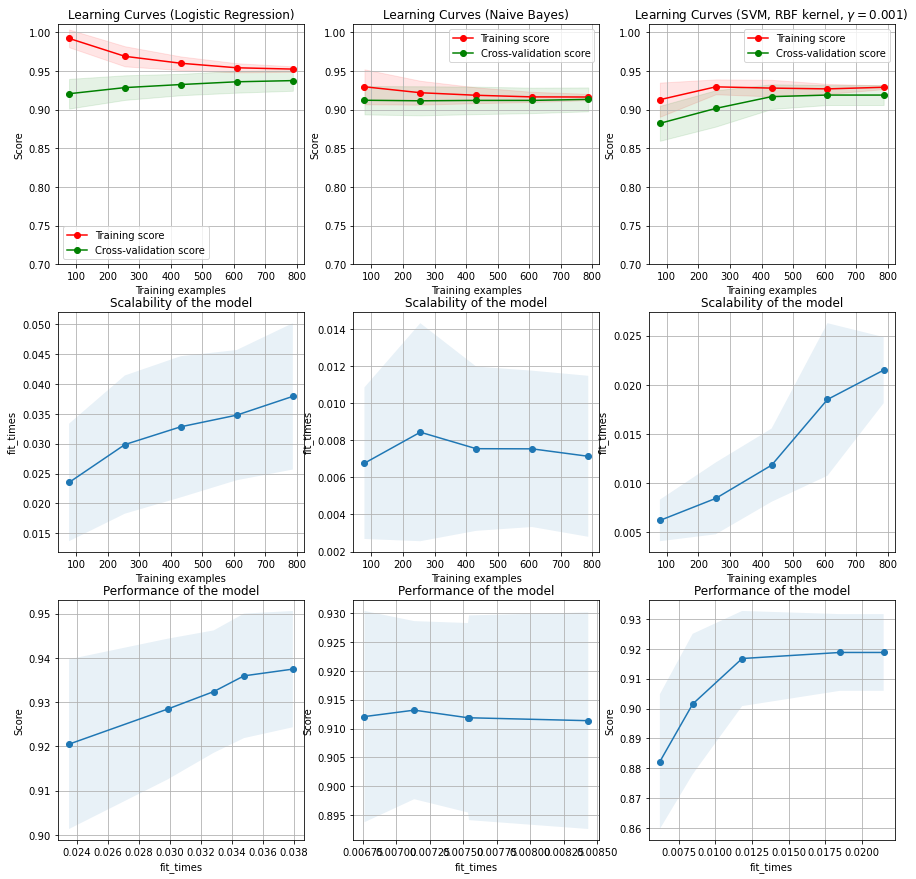

In [74]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

title = "Learning Curves (Logistic Regression)"
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
estimator = LogisticRegression(max_iter=1000)
plot_learning_curve(
    estimator, title, under_X, under_y, axes=axes[:, 0], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

title = "Learning Curves (Naive Bayes)"
# Cross validation with 50 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(
    estimator, title, under_X, under_y, axes=axes[:, 1], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(
    estimator, title, under_X, under_y, axes=axes[:, 2], ylim=(0.7, 1.01), cv=cv, n_jobs=4
)

plt.show()

F1 score and accuracy score for training set: 0.9525 , 0.9525.
F1 score and accuracy score for test set: 0.9296 , 0.9293.
Precision score: 1.0000.
Recall score: 0.8750.


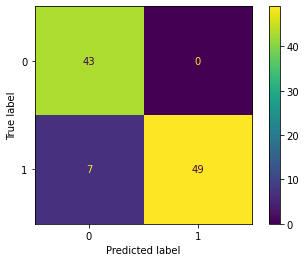

In [100]:
clf_log = LogisticRegression(max_iter=1000)
y_pred_test = basic_train_and_test(clf_log, X_train, X_test, y_train, y_test)
cm = get_confusion_matrix(clf_log, y_pred_test, y_test)
display_cm(clf_log, cm)

print("Precision score: {:.4f}.".format(precision_score(y_test, y_pred_test)))
print("Recall score: {:.4f}.".format(recall_score(y_test, y_pred_test)))

In [63]:
print("Logistic Regression with penalty l2")
print(classification_report(y_test,y_pred_test))

Logistic Regression with penalty l2
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        43
           1       1.00      0.88      0.93        56

    accuracy                           0.93        99
   macro avg       0.93      0.94      0.93        99
weighted avg       0.94      0.93      0.93        99



F1 score and accuracy score for training set: 0.9559 , 0.9559.
F1 score and accuracy score for test set: 0.9296 , 0.9293.
Precision score: 0.9804.
Recall score: 0.8929.


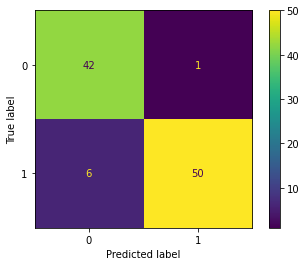

In [101]:
clf_log = LogisticRegression(max_iter=1000, penalty='none')
y_pred_test = basic_train_and_test(clf_log, X_train, X_test, y_train, y_test)

cm = get_confusion_matrix(clf_log, y_pred_test, y_test)
display_cm(clf_log, cm)

print("Precision score: {:.4f}.".format(precision_score(y_test, y_pred_test)))
print("Recall score: {:.4f}.".format(recall_score(y_test, y_pred_test)))

In [96]:
print("Logistic Regression  with no penalty")
print(classification_report(y_test,y_pred_test))

Logistic Regression  with no penalty
              precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.98      0.89      0.93        56

    accuracy                           0.93        99
   macro avg       0.93      0.93      0.93        99
weighted avg       0.93      0.93      0.93        99



F1 score and accuracy score for training set: 0.9445 , 0.9446.
F1 score and accuracy score for test set: 0.9195 , 0.9192.
Precision score: 1.0000.
Recall score: 0.8571.


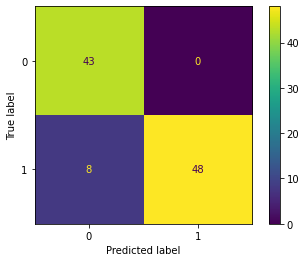

In [102]:
clf_svm = SVC(kernel="rbf")
y_pred_test = basic_train_and_test(clf_svm, X_train, X_test, y_train, y_test)
cm = get_confusion_matrix(clf_svm, y_pred_test, y_test)
display_cm(clf_svm, cm)

print("Precision score: {:.4f}.".format(precision_score(y_test, y_pred_test)))
print("Recall score: {:.4f}.".format(recall_score(y_test, y_pred_test)))

In [67]:
print("SVC")
print(classification_report(y_test,y_pred_test))

SVC
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        43
           1       1.00      0.86      0.92        56

    accuracy                           0.92        99
   macro avg       0.92      0.93      0.92        99
weighted avg       0.93      0.92      0.92        99



F1 score and accuracy score for training set: 0.9977 , 0.9977.
F1 score and accuracy score for test set: 0.9195 , 0.9192.
Precision score: 0.9615.
Recall score: 0.8929.


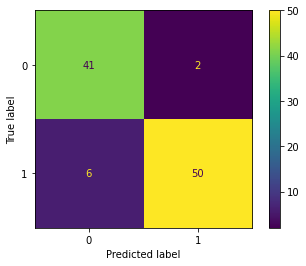

In [68]:
from sklearn.neural_network import MLPClassifier

clf_nn = MLPClassifier(hidden_layer_sizes=(12,12), max_iter=750)
y_pred_test = basic_train_and_test(clf_nn, X_train, X_test, y_train, y_test)
cm = get_confusion_matrix(clf_nn, y_pred_test, y_test)
display_cm(clf_nn, cm)

print("Precision score: {:.4f}.".format(precision_score(y_test, y_pred_test)))
print("Recall score: {:.4f}.".format(recall_score(y_test, y_pred_test)))

In [69]:
print("Neural Network")
print(classification_report(y_test,y_pred_test))

Neural Network
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        43
           1       0.96      0.89      0.93        56

    accuracy                           0.92        99
   macro avg       0.92      0.92      0.92        99
weighted avg       0.92      0.92      0.92        99



In [47]:
from sklearn.model_selection import KFold, learning_curve, validation_curve
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, cross_validate, learning_curve


In [48]:
def parameter_tuning(X_train, X_test, y_train, y_test, model, tuned_parameters, include_grid=False):
    
    scores = ['accuracy']
    
    best_parameters = []

    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        clf = GridSearchCV(
            model, tuned_parameters, scoring=score
        )
        clf.fit(X_train, y_train)

        print("Best parameters set found on development set:")
        print()
        best_parameters.append(clf.best_params_)
        print(clf.best_params_)
        print()
        if include_grid:
            print("Grid scores on development set:")
            print()
            means = clf.cv_results_['mean_test_score']
            stds = clf.cv_results_['std_test_score']
            for mean, std, params in zip(means, stds, clf.cv_results_['params']):
                print("%0.3f (+/-%0.03f) for %r"
                      % (mean, std * 2, params))
            print()

        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        y_true, y_pred = y_test, clf.predict(X_test)
        print(classification_report(y_true, y_pred))
        print()
        
    return best_parameters

In [77]:
tuned_log_parameters = [{'solver': ['lbfgs'], 'max_iter': [100, 400],
                         'C': [1, 10, 100, 1000], 'class_weight': ['balanced'],
                         'penalty': ['l2']},
                    {'solver': ['liblinear'], 'max_iter': [100, 400],
                         'C': [1, 10, 100, 1000], 'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2']}]
best_log_parameters = parameter_tuning(X_train, X_test, y_train, y_test, LogisticRegression(), tuned_log_parameters)

# Tuning hyper-parameters for accuracy



/home/alexandre/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandre/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

Best parameters set found on development set:

{'C': 1000, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.98      0.89      0.93        56

    accuracy                           0.93        99
   macro avg       0.93      0.93      0.93        99
weighted avg       0.93      0.93      0.93        99




/home/alexandre/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:


tuned_svm_parameters = [{'C': [1, 3, 10, 30, 100, 1000], 
              'gamma': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1],
              'kernel': ['rbf']}]
best_svm_parameters = parameter_tuning(X_train, X_test, y_train, y_test, SVC(), tuned_svm_parameters)


# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'C': 30, 'gamma': 0.01, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.88      0.98      0.92        43
           1       0.98      0.89      0.93        56

    accuracy                           0.93        99
   macro avg       0.93      0.93      0.93        99
weighted avg       0.93      0.93      0.93        99




In [73]:
tuned_nn_parameters = [{'solver': ['adam'], 'max_iter': [1000],
                     'hidden_layer_sizes': [(12,12), (12,12,12)], 'activation': ['tanh', 'relu'],
                     'alpha': [1e-3,1e-4], 'learning_rate': ['constant', 'invscaling'], 
                     'learning_rate_init': [0.001, 0.01]}]
best_nn_parameters = parameter_tuning(X_train, X_test, y_train, y_test, MLPClassifier(), tuned_nn_parameters)


# Tuning hyper-parameters for accuracy

Best parameters set found on development set:

{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (12, 12), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'max_iter': 1000, 'solver': 'adam'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        43
           1       0.94      0.84      0.89        56

    accuracy                           0.88        99
   macro avg       0.88      0.88      0.88        99
weighted avg       0.89      0.88      0.88        99




In [75]:
def kfold_test(X_train, y_train, X_test, y_test, clf, k):
    kf = KFold(n_splits=k, shuffle=True)
    
    scores = cross_validate(clf, X_train, y_train, scoring='accuracy', cv=k, return_estimator=True)

    avg_acc_score = sum(scores['test_score'])/k

    print('Accuracy of each fold - {}'.format(scores['test_score']))
    print('Avg accuracy : {}'.format(avg_acc_score))
    
    best_estimator = scores['estimator'][np.argmax(scores['test_score'])]

    y_pred_test = best_estimator.predict(X_test)
    acc_test = sum(y_test == y_pred_test) / float(len(y_pred_test))
    f1_test = f1_score(y_test, y_pred_test, average='weighted')

    print("Using the best estimator from CV:")
    print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1_test , acc_test))
    
    return y_pred_test

/home/alexandre/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandre/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

Accuracy of each fold - [0.94594595 0.9321267  0.95927602 0.92307692]
Avg accuracy : 0.940106395988749
Using the best estimator from CV:
F1 score and accuracy score for test set: 0.9195 , 0.9192.


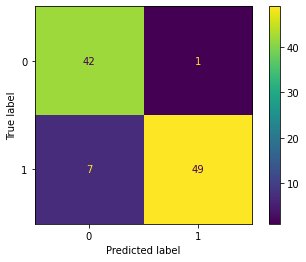

In [105]:
clf_log_opt = LogisticRegression(C= 1000, class_weight= 'balanced', max_iter=100, penalty= 'l2', solver='lbfgs')
y_pred_test = kfold_test(X_train, y_train, X_test, y_test, clf_log_opt, 4)
cm = get_confusion_matrix(clf_log_opt, y_pred_test, y_test)
display_cm(clf_log_opt, cm)

Accuracy of each fold - [0.93693694 0.9321267  0.95022624 0.91402715]
Avg accuracy : 0.9333292568586685
Using the best estimator from CV:
F1 score and accuracy score for test set: 0.9296 , 0.9293.


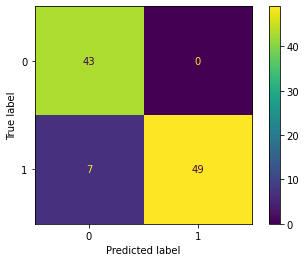

In [104]:
clf_svm = SVC(kernel="rbf", gamma=0.01,C=30)
y_pred_test = kfold_test(X_train, y_train, X_test, y_test, clf_log_opt, 4)
cm = get_confusion_matrix(clf_svm, y_pred_test, y_test)
display_cm(clf_svm, cm)

F1 score and accuracy score for training set: 0.9989 , 0.9989.
F1 score and accuracy score for test set: 0.9095 , 0.9091.


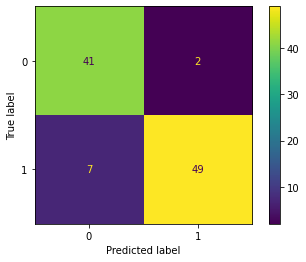

In [106]:

clf_nn = MLPClassifier(solver='adam',hidden_layer_sizes=(12,12), max_iter=1000,activation='relu', alpha=0.001, learning_rate= 'invscaling',learning_rate_init=0.001,)
y_pred_test = basic_train_and_test(clf_nn, X_train, X_test, y_train, y_test)
cm = get_confusion_matrix(clf_nn, y_pred_test, y_test)
display_cm(clf_nn, cm)

In [121]:
def val_curvve(clf,X,y,name,range_):
    train_scores, test_scores = validation_curve(
        clf,
        X,
        y,
        param_name=name,
        param_range=range_,
        scoring="accuracy",
        n_jobs=5,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve ")
    plt.xlabel(name)
    plt.ylabel("Score")
    plt.plot(range_,train_scores_mean,label="Training score", color="r")
    

    plt.plot(
        param_range, test_scores_mean, label="Cross-validation score", color="navy")
  
    plt.legend(loc="best")
    plt.show()

/home/alexandre/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandre/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

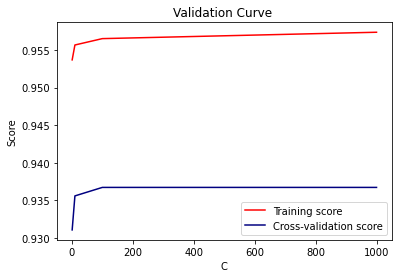

/home/alexandre/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandre/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

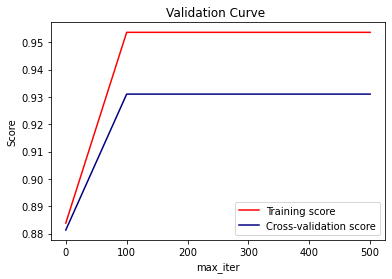

In [127]:
param_range = [1, 10, 100, 1000]
val_curvve(LogisticRegression(),X_train,y_train,"C",param_range)
param_range=[0,100, 400,500]
val_curvve(LogisticRegression(),X_train,y_train,"max_iter",param_range)



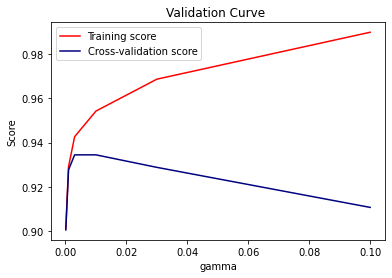

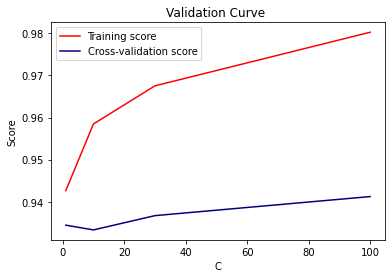

In [124]:
param_range = [0.0001,0.001, 0.003, 0.01, 0.03, 0.1]

val_curvve(SVC(),X_train,y_train,"gamma",param_range)
param_range = [1,10,30,100]

val_curvve(SVC(),X_train,y_train,"C",param_range)


In [ ]:


param_range = [0.001, 0.01,0.05,0.1]

val_curvve(MLPClassifier(max_iter=1000),X_train,y_train,"learning_rate_init",param_range)
param_range = [1e-2,1e-3,1e-4,1e-5]
val_curvve(MLPClassifier(max_iter=1000),X_train,y_train,"alpha",param_range)
